<a href="https://colab.research.google.com/github/ariesslin/ie7500-g1-tweet-sentiment-nlp/blob/main/scripts/3.%20Model%20Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## !!!! WIP !!!! dont use this!!!

<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>3. Model Development</strong></h2>
  <p style="color:#333333;">Model Selection and Preliminary Performance Testing</p>
</div>

The selection of TF-IDF + Logistic Regression, LSTM, and BERT for sentiment analysis of tweets is grounded in both established research and best practices in natural language processing. TF-IDF combined with Logistic Regression provides a strong and interpretable baseline, particularly effective for sparse and high-dimensional text data like tweets (Ramos, 2003; Wang & Manning, 2012). It has been widely used in sentiment analysis tasks due to its simplicity and effectiveness in capturing word importance without sequence modeling. LSTM (Long Short-Term Memory) networks, introduced by Hochreiter & Schmidhuber (1997), are well-suited for handling the sequential nature of text and capturing long-term dependencies, which enhances performance on informal and context-sensitive content such as tweets (Zhou et al., 2016). BERT (Bidirectional Encoder Representations from Transformers) by Devlin et al. (2019) represents the state-of-the-art in many NLP tasks, including sentiment analysis, due to its deep contextual understanding and bidirectional attention mechanism, making it particularly effective for nuanced sentiment interpretation in short texts. This multi-model evaluation approach allows us to compare performance across lexical, sequential, and contextual modeling strategies. Only after testing all three will we select the best-performing model based on predefined evaluation metrics, followed by full-scale training and final evaluation, as recommended in model selection best practices (Sammut & Webb, 2017; Zhang et al., 2021). This ensures robustness, fairness, and optimal utilization of resources.

**References:**

* Ramos, J. (2003). Using TF-IDF to determine word relevance in document queries.
* Wang, S., & Manning, C. D. (2012). Baselines and Bigrams: Simple, Good Sentiment and Topic Classification.
* Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural Computation.
* Zhou, P., et al. (2016). Attention-Based Bidirectional LSTM Networks for Relation Classification.
* Devlin, J., et al. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.
* Sammut, C., & Webb, G. I. (2017). Encyclopedia of Machine Learning and Data Mining.
* Zhang, Y., et al. (2021). A Comprehensive Review on Deep Learning for Text Classification.


## Model Development

Following thorough exploratory data analysis and data preprocessing, we now move into the model development phase. The objective is to evaluate different machine learning and deep learning architectures to classify tweet sentiment effectively using the Sentiment140 dataset.

Given the informal and brief nature of tweets, sentiment classification presents unique challenges: sparse context, slang, emojis, abbreviations, and inconsistent punctuation. To address these, we explore a spectrum of model complexities — from classical linear models to deep language models — to assess their performance, interpretability, and scalability.

The following models will be implemented and compared:

- **TF-IDF + Logistic Regression**: A classical baseline that leverages term frequency and inverse document frequency to convert text into numeric features before applying a simple, interpretable classifier.
- **Bidirectional LSTM**: A recurrent neural network capable of capturing long-term dependencies and understanding contextual flow in short, noisy texts.
- **DistilBERT**: A distilled transformer model pretrained on large corpora, providing state-of-the-art performance in many NLP tasks, including sentiment analysis.

Each model will be trained using the preprocessed dataset, and evaluated on the validation and test sets. Evaluation metrics include:

- **Accuracy**  
- **Precision, Recall, F1-Score**  
- **Confusion Matrix**  
- **Training time and resource cost**

This multi-model comparison aims to answer:

- Which model best captures sentiment from tweets?
- What are the trade-offs between speed, complexity, and accuracy?
- Which model generalizes best to unseen real-world tweet data?

The results will guide practical model selection for sentiment-sensitive applications in finance, customer experience monitoring, and public policy analysis.


In [1]:
# importing all libraries here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import gdown
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
import zipfile
import requests
import io

In [5]:
# GitHub raw link (valid after Git commit/push)
zip_url = "https://raw.githubusercontent.com/ariesslin/ie7500-g1-tweet-sentiment-nlp/main/processed_data/sentiment140_splits.zip"

# Download the zip
response = requests.get(zip_url)
if response.status_code != 200:
    raise Exception(f"Failed to download. Status code: {response.status_code}")

# Extract only training data
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extract("train_dataset.csv", path="processed_data")
    print("Extracted train_dataset.csv")

# Load into DataFrame
train_df = pd.read_csv("processed_data/train_dataset.csv")
print("Train shape:", train_df.shape)

Exception: Failed to download. Status code: 404

In [3]:
# GitHub raw URL to the zip file
zip_url = "https://raw.githubusercontent.com/ariesslin/ie7500-g1-tweet-sentiment-nlp/main/processed_data/train_dataset_comp.zip"

# Download the zip file from GitHub
response = requests.get(zip_url)
if response.status_code != 200:
    raise Exception(f" Failed to download zip file. Status code: {response.status_code}")

# Extract only 'train_dataset.csv'
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    if "train_dataset.csv" in zip_ref.namelist():
        zip_ref.extract("train_dataset.csv", path="processed_data")
        print("'train_dataset.csv' extracted successfully.")
    else:
        raise FileNotFoundError("'train_dataset.csv' not found in the zip archive.")

# Load the dataset
train_df = pd.read_csv("processed_data/train_dataset.csv")
print(f"Loaded training data with shape: {train_df.shape}")


Exception:  Failed to download zip file. Status code: 404

In [ ]:
# Here, we begin by loading the processed dataset

# Unzip the dataset
with zipfile.ZipFile("processed_data/sentiment140_splits.zip", 'r') as zip_ref:
    zip_ref.extractall("processed_data")

# Load the CSVs into DataFrames
train_df = pd.read_csv("processed_data/train_dataset.csv")
val_df = pd.read_csv("processed_data/val_dataset.csv")
test_df = pd.read_csv("processed_data/test_dataset.csv")

print("Processed datasets successfully loaded.")
print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")


Next, let's load the processed data saved in previous steps


In [ ]:
# Read the preprocessed tweet dataset and assign column names
#Tweets = pd.read_csv("../data/preprocessed_tweets.csv", header=None, names=["text", "target"])
Tweets = pd.read_csv("../processed_data/preprocessed_tweets.csv", header=None, names=["text", "target"])

# Drop any rows where 'text' or 'target' is null
Tweets = Tweets.dropna(subset=["text", "target"])

# Replace 'MENTION' with 'mentionuser' in the 'text' column
Tweets['text'] = Tweets['text'].str.replace('MENTION', 'mentionuser', regex=False)


Tweets.head()

/var/folders/5m/q16b86r92zgbmjpxpdx4ghfw0000gn/T/ipykernel_1799/2798388662.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  Tweets = pd.read_csv("../processed_data/preprocessed_tweets.csv", header=None, names=["text", "target"])


,text,target
0,text,target
1,mentionuser thats bummer shoulda got david car...,0
2,upset cant update facebook texting might cry r...,0
3,mentionuser dived many time ball managed save ...,0
4,whole body feel itchy like fire,0


#### Next we take first 70% of each negative and positive tweets for training, 15% for validation, and 15% for testing.
Sampling sould be done in a way that respects tweets length distribution.

This way we make sure all models are trained and validated using the same dataset and we have a good ground for fair comparison.

This step is valid because we showed in EDA section that negative and positive tewwts are equally distributed.

In [ ]:
# Define bins and labels from the bar chart in our EDA
bin_edges = [0, 20, 40, 60, 80, 100, 120, 140]
bin_labels = ['0–20', '21–40', '41–60', '61–80', '81–100', '101–120', '121–140']

# Step 1: Assign length buckets safely
def assign_length_buckets(df):
    df = df.copy()
    df['text'] = df['text'].fillna('').astype(str)  # Ensure no NaNs
    df['text_length'] = df['text'].str.len()
    df['length_bucket'] = pd.cut(
        df['text_length'],
        bins=bin_edges,
        labels=bin_labels,
        right=True,
        include_lowest=True
    )
    df = df.dropna(subset=['length_bucket'])  # Drop any that didn't fall in bin
    return df

# Step 2: Stratified split function
def stratified_split_by_length_bucket(df_class, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    df_class = assign_length_buckets(df_class)

    # Split into train and temp
    train_df, temp_df = train_test_split(
        df_class,
        test_size=1 - train_ratio,
        stratify=df_class['length_bucket'],
        random_state=42
    )

    # Split temp into validation and test
    val_ratio_adjusted = val_ratio / (val_ratio + test_ratio)
    val_df, test_df = train_test_split(
        temp_df,
        test_size=1 - val_ratio_adjusted,
        stratify=temp_df['length_bucket'],
        random_state=42
    )

    return train_df.drop(columns='length_bucket'), val_df.drop(columns='length_bucket'), test_df.drop(columns='length_bucket')

# Step 3: Filter by sentiment
df_neg = Tweets[Tweets['target'] == 0]
df_pos = Tweets[Tweets['target'] == 4]

# Step 4: Apply stratified splitting
neg_train, neg_val, neg_test = stratified_split_by_length_bucket(df_neg)
pos_train, pos_val, pos_test = stratified_split_by_length_bucket(df_pos)

# Step 5: Combine and shuffle
train_df = pd.concat([neg_train, pos_train]).sample(frac=1, random_state=42).reset_index(drop=True)
val_df = pd.concat([neg_val, pos_val]).sample(frac=1, random_state=42).reset_index(drop=True)
test_df = pd.concat([neg_test, pos_test]).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 6: Extract input and labels
X_train = train_df['text']
y_train = train_df['target']
X_val = val_df['text']
y_val = val_df['target']
X_test = test_df['text']
y_test = test_df['target']

# Final check
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "| y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)


Train shape: (936183, 3)
Validation shape: (200611, 3)
Test shape: (200612, 3)
X_train shape: (936183,) | y_train shape: (936183,)
X_val shape: (200611,) | y_val shape: (200611,)
X_test shape: (200612,) | y_test shape: (200612,)


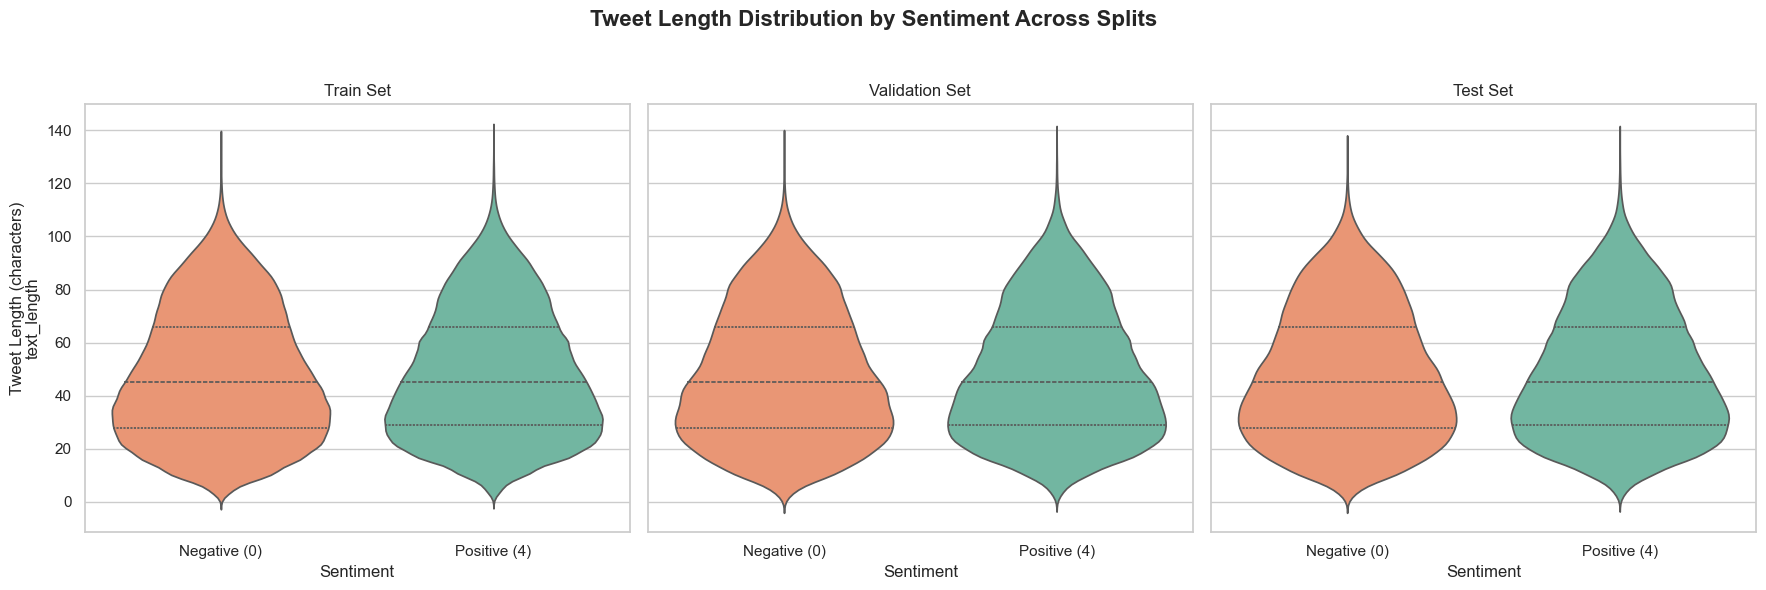

In [ ]:
# here we validate the distributions are identical and intact

# Combine text + label for plotting, and calculate text length
train_plot_df = pd.concat([X_train, y_train], axis=1).copy()
val_plot_df = pd.concat([X_val, y_val], axis=1).copy()
test_plot_df = pd.concat([X_test, y_test], axis=1).copy()

# Ensure text_length column is present
train_plot_df['text_length'] = train_plot_df['text'].str.len()
val_plot_df['text_length'] = val_plot_df['text'].str.len()
test_plot_df['text_length'] = test_plot_df['text'].str.len()

# Ensure 'target' is integer (not string) for palette mapping
train_plot_df['target'] = train_plot_df['target'].astype(int)
val_plot_df['target'] = val_plot_df['target'].astype(int)
test_plot_df['target'] = test_plot_df['target'].astype(int)

# Define sentiment color palette
sentiment_palette = {
    0: '#fc8d62',  # Negative
    4: '#66c2a5'   # Positive
}

# Set up subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot train
sns.violinplot(ax=axes[0], data=train_plot_df, x='target', y='text_length', hue='target', palette=sentiment_palette, inner='quartile', legend=False)
axes[0].set_title('Train Set')
axes[0].set_xlabel('Sentiment')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Negative (0)', 'Positive (4)'])

# Plot validation
sns.violinplot(ax=axes[1], data=val_plot_df, x='target', y='text_length', hue='target', palette=sentiment_palette, inner='quartile', legend=False)
axes[1].set_title('Validation Set')
axes[1].set_xlabel('Sentiment')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Negative (0)', 'Positive (4)'])

# Plot test
sns.violinplot(ax=axes[2], data=test_plot_df, x='target', y='text_length', hue='target', palette=sentiment_palette, inner='quartile', legend=False)
axes[2].set_title('Test Set')
axes[2].set_xlabel('Sentiment')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['Negative (0)', 'Positive (4)'])

# Shared Y-label and layout
fig.supylabel('Tweet Length (characters)', fontsize=12)
plt.suptitle("Tweet Length Distribution by Sentiment Across Splits", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### After we made sure we have good and valid splits, we now move on to modeling part, where we will only use training and validation set for model comparison and selection, ***testing dataset will only be used in model performance evaluation section***


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.1 Baseline Model – TF-IDF + Logistic Regression</strong></h2>
  <p style="color:#333333;">TF-IDF vectorization + logistic regression as a benchmark.</p>
</div>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ariesslin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization and stopword removal
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Load dataset from the preprocessed data
Tweets_copy_df = Tweets.copy()
Tweets_copy_df.head()

,text,target
0,text,target
1,mentionuser thats bummer shoulda got david car...,0
2,upset cant update facebook texting might cry r...,0
3,mentionuser dived many time ball managed save ...,0
4,whole body feel itchy like fire,0


In [ ]:


# Map sentiment labels (0=negative, 4=positive) to (0=negative, 1=positive)
#Tweets_copy_df['target'] = Tweets_copy_df['target'].map({0: 0, 4: 1})

# Preprocess text
Tweets_copy_df['clean_text'] = Tweets_copy_df['text'].apply(preprocess_text)

In [ ]:
# Split data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    Tweets_copy_df['clean_text'], Tweets_copy_df['target'], test_size=0.2, random_state=42
)
print("X_train shape:", X_train_1.shape, "| y_train shape:", y_train_1.shape)
print("X_test shape:", X_test_1.shape, "| y_test shape:", y_test_1.shape)

X_train shape: (1279596,) | y_train shape: (1279596,)
X_test shape: (319900,) | y_test shape: (319900,)


In [ ]:
# Create pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=10000,
        ngram_range=(1, 2) )
    ),
    ('clf', LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced')
    )
])

In [ ]:
y_train_1.head()

174335     0
306270     0
1518505    4
1258400    4
508917     0
Name: target, dtype: object

In [ ]:
print("Missing values in y_train:", y_train_1.isna().sum())
print("Unique values before conversion:", y_train_1.unique())
print("Missing values in y_train:", y_test_1.isna().sum())
print("Unique values before conversion:", y_test_1.unique())

Missing values in y_train: 0
Unique values before conversion: ['0' 0 4 'target']
Missing values in y_train: 0
Unique values before conversion: [4 0 '0']


In [ ]:
y_train_1 = y_train_1.apply(lambda x: 0 if x=='target' else x)

In [ ]:
print("Unique values before conversion:", y_train_1.unique())

Unique values before conversion: ['0' 0 4]


In [ ]:
# Ensure your target variable is properly formatted
y_train_1 = pd.to_numeric(y_train_1, errors='coerce').astype(int)
y_test_1 = pd.to_numeric(y_test_1, errors='coerce').astype(int)

# Verify the conversion
print("Unique values in y_train:", np.unique(y_train_1))
print("Data type:", y_train_1.dtype)
print("Unique values in y_train:", np.unique(y_test_1))
print("Data type:", y_test_1.dtype)

# Train model
pipeline.fit(X_train_1, y_train_1)

Unique values in y_train: [0 4]
Data type: int64
Unique values in y_train: [0 4]
Data type: int64


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [ ]:
# Evaluate
y_pred_1 = pipeline.predict(X_test_1)
print("Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("\nClassification Report:")
print(classification_report(y_test_1, y_pred_1))

# Example prediction
test_tweet = "I love this product! It's amazing."
clean_test = preprocess_text(test_tweet)
print("\nTest Tweet Prediction:", pipeline.predict([clean_test])[0])

Accuracy: 0.7844076273835574

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159404
           4       0.77      0.81      0.79    160496

    accuracy                           0.78    319900
   macro avg       0.78      0.78      0.78    319900
weighted avg       0.78      0.78      0.78    319900


Test Tweet Prediction: 4


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def tune_hyperparameters(X_train, y_train):
    """
    Perform hyperparameter tuning for TF-IDF + Logistic Regression pipeline

    Args:
        X_train: Training text data
        y_train: Training labels

    Returns:
        Best estimator and best parameters found
    """
    # Define the pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Define parameter grid
    param_grid = {
        'tfidf__max_features': [5000, 10000, 20000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or unigrams+bigrams
        'tfidf__min_df': [1, 5],  # minimum document frequency
        'tfidf__max_df': [0.7, 0.9],  # maximum document frequency (ignore too common words)
        'clf__C': [0.1, 1, 10],  # inverse of regularization strength
        'clf__penalty': ['l1', 'l2'],  # regularization type
        'clf__class_weight': [None, 'balanced']
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,  # 3-fold cross-validation
        scoring='f1_weighted',  # can change to 'accuracy' or other metrics
        n_jobs=-1,  # use all available CPU cores
        verbose=1
    )

    # Perform the grid search
    print("Starting grid search...")
    grid_search.fit(X_train, y_train)

    # Print results
    print("\nBest parameters found:")
    print(grid_search.best_params_)

    print("\nBest cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_, grid_search.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import os
import joblib

def tune_hyperparameters_with_cache(X_train, y_train, cache_dir='./cache'):
    """
    Perform hyperparameter tuning with memory caching

    Args:
        X_train: Training text data
        y_train: Training labels
        cache_dir: Directory to store cached computations

    Returns:
        Best estimator and best parameters found
    """
    # Create cache directory if it doesn't exist
    os.makedirs(cache_dir, exist_ok=True)

    # Clear previous cache to ensure fresh start
    joblib.Memory(location=cache_dir, verbose=0).clear()

    # Define the pipeline with memory caching
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ], memory=joblib.Memory(location=cache_dir, verbose=0))

    # Define parameter grid (same as before)
    param_grid = {
        'tfidf__max_features': [5000, 10000, 20000],
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'tfidf__min_df': [1, 5],
        'tfidf__max_df': [0.7, 0.9],
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2'],
        'clf__class_weight': [None, 'balanced']
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=3,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )

    # Perform the grid search
    print(f"Starting grid search with caching at {cache_dir}...")
    grid_search.fit(X_train, y_train)

    # Print results
    print("\nBest parameters found:")
    print(grid_search.best_params_)
    print("\nBest cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search.best_estimator_, grid_search.best_params_

In [ ]:
# Tune hyperparameters and test the best_model to predict a sample text:
best_model, best_params = tune_hyperparameters(X_train, y_train)
#best_model, best_params = tune_hyperparameters_with_cache(X_train, y_train, cache_dir='./tfidf_cache')
#cache inspection
#cache = joblib.Memory(location='./cache')
#print(cache.reduce_size())

Starting grid search...
Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [ ]:
#clean cache
#import shutil
#shutil.rmtree('./cache')  # Complete cleanup

In [ ]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.2 LSTM Model</strong></h2>
  <p style="color:#333333;">Bidirectional LSTM with pre-trained embeddings (e.g., Wrod2Vec).</p>
</div>

In [ ]:
# Step 1: Reinstall compatible keras
#!pip uninstall -y keras
#!pip install -q keras==3.8.0

### Use !pip install -r "../requirements.txt" at the beginning of the notebook instead

In [ ]:
# loading all libraries here
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# we tokenize each tweet for training and testing data

training_df = train_plot_df.copy()
val_df = val_plot_df.copy()

# Apply gensim's tokenizer
tokenized_train = training_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()
tokenized_val = val_df['text'].dropna().astype(str).apply(simple_preprocess).tolist()

In [ ]:
# first train our Word2Vec on the Tokenized Data

embedding_dim = 100

model_LSTM = Word2Vec(
    sentences=tokenized_train,
    vector_size=embedding_dim,
    window=10,
    min_count=2,
    sg=1,  # Skip-gram
    seed=42,
    workers=10
)

word2vec_model = model_LSTM.wv  # Use KeyedVectors for embedding lookup

In [ ]:
# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_train_texts)

word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
found = 0

for word, i in word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1

print(f"Words matched: {found}/{len(word_index)}")

This will cause some major issues as we train the model, in fact by several experiments, the model never actually really learned, i could not even make it overfit.
This means that likely our Word2Vec trained on clean tokens but Tokenizer worked on noisy ones (e.g., lollll, omggg)


In [ ]:
# for now, i will only limit tokenisation on trained words

# Prepare for Keras Tokenizer

# Join tokens back into space-separated strings
tokenized_train_texts = [' '.join(tokens) for tokens in tokenized_train]
tokenized_val_texts = [' '.join(tokens) for tokens in tokenized_val]

# Fit tokenizer on training texts
tokenizer = Tokenizer(num_words=82014)
tokenizer.fit_on_texts(tokenized_train_texts)

word_index = tokenizer.word_index

In [ ]:
# Next, we Build the Embedding Matrix

embedding_matrix = np.zeros((tokenizer.num_words, embedding_dim))

found = 0
for word, i in tokenizer.word_index.items():
    if i >= tokenizer.num_words:
        continue
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        found += 1
print(f"Words matched: {found}/{tokenizer.num_words}")


In [ ]:
# Next, Convert Texts to Sequences and Pad

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(tokenized_train_texts)
X_val_seq = tokenizer.texts_to_sequences(tokenized_val_texts)

# Define max sequence length
max_len = max(len(seq) for seq in X_train_seq)

# Pad sequences to same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')


In [ ]:
# We convert the target to float, and encode 0 and 1 to accommodate for sigmoid:

y_train = np.where(y_train == 4, 1.0, 0.0).astype(np.float32)
y_val = np.where(y_val == 4, 1.0, 0.0).astype(np.float32)


In [ ]:
# First, we reduce our model to a small Sanity Test

# Use a very small subset to test if model can overfit
X_small = X_train_pad[:100]
y_small = y_train[:100]

# Sanity check: Create a simple model
model = Sequential()
model.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=X_small.shape[1],
    trainable=True
))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Fit to a small subset to test if it can overfit
history = model.fit(X_small, y_small, epochs=20, batch_size=10, verbose=2)

In [ ]:
############# ---------- The output below is from older test execution --------------------

In [ ]:
# Check Max Index vs Embedding Size

print("Max index in padded input:", np.max(X_train_pad))
print("Embedding matrix shape:", embedding_matrix.shape)


In [ ]:
# Visualize Embedding Lookups

row = X_train_pad[0]  # a tokenized tweet
vecs = embedding_matrix[row]
print("Any rows all zero?", np.any(np.all(vecs == 0, axis=1)))  # Expect False
print("How many zero vectors in one tweet?", np.sum(np.all(vecs == 0, axis=1)))


#### quick debugging insights

That means ~74% of tokens in a tweet have no embeddings, the model is learning from almost nothing.

Why?
Because those tokens likely correspond to words not found in Word2Vec vocabulary. This means our embedding matrix isn't covering the actual tokens used in training.

In [ ]:
############# ---------------------------------------------------------------------------

In [ ]:
# Now, we build our model

# Define model
LSTMmodel = Sequential()

# 1. Embedding layer
LSTMmodel.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_matrix.shape[1],
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))

# 2. First LSTM
LSTMmodel.add(Bidirectional(LSTM(265, return_sequences=True)))

LSTMmodel.add(Dropout(0.5))

# 3. Second LSTM
LSTMmodel.add(Bidirectional(LSTM(128)))

# 4. Dropout
LSTMmodel.add(Dropout(0.3))

# 5. Output
LSTMmodel.add(Dense(1, activation='sigmoid'))

# Compile
optimizer = Nadam(learning_rate=0.001)
LSTMmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show summary
LSTMmodel.summary()

In [ ]:
# Next we train our model, and then visualize performance

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = LSTMmodel.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=20,
    batch_size=500,
    callbacks=[early_stop]
)

# Save the model and download
LSTMmodel.save("sentiment_lstm_model.keras")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

______________________________________________________________________________________________________________________________


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.3 BERT Model</strong></h2>
  <p style="color:#333333;">Fine-tuning DistilBERT or similar transformer model (if feasible).</p>
</div>



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.4 Model Comparison and Selection </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>4.5 Final Model Training </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>


<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>5. Model Evaluation </strong></h2>
  <p style="color:#333333;">Evaluate using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.</p>
</div>



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>6. Conclusion</strong></h2>
  <p style="color:#333333;">Summarize findings and insights, discuss trade-offs, and generalization potential.</p>
</div>



<div style="background-color:#e6f2ff; border-left:8px solid #0059b3; padding:20px; margin:20px 0;">
  <h2 style="color:#003366;"><strong>9. Future Work</strong></h2>
  <p style="color:#333333;">Suggest future extensions like streaming integration or domain adaptation.</p>
</div>
